In [4]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, Resizing, Rescaling
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data Preparation and Model Building

In [5]:
rawTrain = pd.read_csv(r'C:\Users\imuni\OneDrive\Desktop\GMU\Classes\CS\CS482\finalproj\sign_mnist_train.csv')
rawTest = pd.read_csv(r'C:\Users\imuni\OneDrive\Desktop\GMU\Classes\CS\CS482\finalproj\sign_mnist_test.csv')

In [6]:
trainData = np.array(rawTrain, dtype='float32')
testData = np.array(rawTest, dtype='float32')

In [7]:
trainData

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

In [8]:
trainData.shape

(27455, 785)

In [9]:
testData.shape

(7172, 785)

In [10]:
labels = []
for i in range(65, 90):
    if i != 74:
        labels.append(chr(i))

In [11]:
labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

Label is P


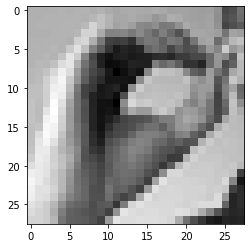

In [12]:
sampleIdx = 125
sample_img = trainData[sampleIdx, 1:].reshape((28, 28))
plt.imshow(sample_img, cmap='gray')
print('Label is', labels[int(trainData[sampleIdx, 0])])

In [13]:
trainX = trainData[:, 1:]/255.0
testX = testData[:, 1:]/255.0
trainY = trainData[:, 0]
trainYCategorical = to_categorical(trainY, num_classes=25)
testY = testData[:, 0]
testYCategorical = to_categorical(testY, num_classes=25)

In [14]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testY.shape[0], 28, 28, 1))

In [15]:
print(trainX.shape)
print(testX.shape)
print(trainYCategorical.shape)
print(testYCategorical.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)
(27455, 25)
(7172, 25)


In [16]:
batchSize = 128
numEpochs = 10

In [17]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
#cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
#cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3, 3), activation='relu'))
#cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(25, activation='softmax'))

In [18]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [19]:
performance = cnn.fit(trainX, trainYCategorical, batch_size=batchSize, epochs=numEpochs, verbose=1, validation_data=(testX, testYCategorical))

Epoch 1/10
215/215 [==============================] - 33s 153ms/step - loss: 2.4655 - acc: 0.2358 - val_loss: 1.0750 - val_acc: 0.6718
Epoch 2/10
215/215 [==============================] - 34s 160ms/step - loss: 0.7516 - acc: 0.7441 - val_loss: 0.3718 - val_acc: 0.8919
Epoch 3/10
215/215 [==============================] - 34s 158ms/step - loss: 0.3095 - acc: 0.8943 - val_loss: 0.1965 - val_acc: 0.9465
Epoch 4/10
215/215 [==============================] - 37s 174ms/step - loss: 0.1794 - acc: 0.9394 - val_loss: 0.1641 - val_acc: 0.9650
Epoch 5/10
215/215 [==============================] - 37s 170ms/step - loss: 0.1204 - acc: 0.9601 - val_loss: 0.1196 - val_acc: 0.9713
Epoch 6/10
215/215 [==============================] - 35s 163ms/step - loss: 0.0905 - acc: 0.9708 - val_loss: 0.1159 - val_acc: 0.9686
Epoch 7/10
215/215 [==============================] - 34s 160ms/step - loss: 0.0696 - acc: 0.9783 - val_loss: 0.1102 - val_acc: 0.9742
Epoch 8/10
215/215 [==============================] - 3

In [20]:
forecast = np.argmax(cnn.predict(testX), axis=-1)
accuracy = accuracy_score(testY, forecast)
print('Test accuracy was', accuracy)

Test accuracy was 0.9714166201896264


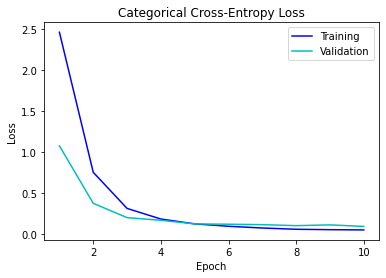

In [21]:
trLoss = performance.history['loss']
valLoss = performance.history['val_loss']
epochs = range(1, len(trLoss) + 1)
plt.plot(epochs, trLoss, 'b', label='Training')
plt.plot(epochs, valLoss, 'c', label='Validation')
plt.legend()
plt.title('Categorical Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

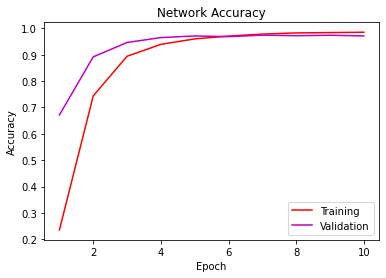

In [22]:
trAcc = performance.history['acc']
valAcc = performance.history['val_acc']
plt.plot(epochs, trAcc, 'r', label='Training')
plt.plot(epochs, valAcc, 'm', label='Validation')
plt.legend()
plt.title('Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

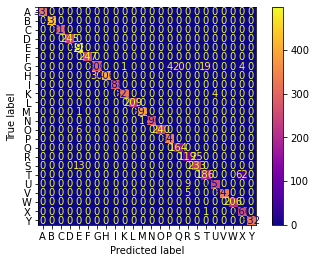

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusionMatrix = confusion_matrix(testY, forecast)
display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=labels)
display.plot(cmap=plt.cm.plasma)
plt.show()

In [296]:
cnn.save('signlang_cnn.h5')
print('The CNN has been saved')

The CNN has been saved


In [1]:
from tensorflow.keras.models import load_model
cnn = load_model(r'C:\Users\imuni\OneDrive\Desktop\GMU\Classes\CS\CS482\finalproj\signlang_cnn.h5')

# Real-World Testing/Application

This secondary program was used to test the CNN on my actual hand instead of testing on images from the given test set

In [2]:
import cv2
import numpy as np

In [11]:
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()
    height, width = frame.shape[0:2]
    region = frame[100:400, 200:500]
    
    region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
    region = cv2.resize(region, (28, 28), interpolation=cv2.INTER_AREA)
    dup = frame.copy()
    cv2.rectangle(dup, (200, 100), (500, 400), (0, 255, 0), 3)

    region = region.reshape(1, 28, 28, 1)
    
    labelChosen = chr(np.argmax(cnn.predict(region, 1, verbose=0)[0]) + 65)
    cv2.putText(dup, 'Prediction: ' + labelChosen, (140, height - 20), cv2.FONT_HERSHEY_DUPLEX, 2, (255, 189, 25), 2, lineType=cv2.LINE_AA)
    cv2.imshow('CS 482 Final Project: Sign Language Classification', dup)
    
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
    
    
capture.release()
capture.destroyAllWindows()

AttributeError: 'cv2.VideoCapture' object has no attribute 'destroyAllWindows'